In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

# Identifying Good & Bad Customers for Granting Credit

In [ ]:
#read data

In [2]:
df = pd.read_csv(r"C:\Users\Ankit Hiremath\Downloads\ProjectonLogisticRegression\6 - Project 2 Logistic Regression\German_Credit_data.csv")

In [3]:
df.head()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
df.shape

(1000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Creditability                                      1000 non-null   int64
 1   Status_of_existing_account                         1000 non-null   int64
 2   Duration_of_Credit_month                           1000 non-null   int64
 3   Payment_Status_of_Previous_Credit(Credit_history)  1000 non-null   int64
 4   Purpose_of_loan                                    1000 non-null   int64
 5   Credit_Amount                                      1000 non-null   int64
 6   Value_of_Savings_account&bonds                     1000 non-null   int64
 7   Years_of_Present_Employment                        1000 non-null   int64
 8   Percentage_of_disposable_income                    1000 non-null   int64
 9   Sex_&_Marital_Status           

In [28]:
df.isnull().sum() #checking for null

Creditability                                        0
Status_of_existing_account                           0
Duration_of_Credit_month                             0
Payment_Status_of_Previous_Credit(Credit_history)    0
Purpose_of_loan                                      0
Credit_Amount                                        0
Value_of_Savings_account&bonds                       0
Years_of_Present_Employment                          0
Percentage_of_disposable_income                      0
Sex_&_Marital_Status                                 0
Guarantors/Debtors                                   0
Duration_in_Present_Residence                        0
Property                                             0
Age_in_years                                         0
Concurrent_Credits                                   0
Housing                                              0
No_of_Credits_at_this__Bank                          0
Occupation                                           0
No_of_depe

In [7]:
df.describe()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [29]:
 df.corr()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
Creditability,1.000000,0.350847,-0.214927,0.228785,-0.017979,-0.154740,0.178943,0.116002,-0.072404,0.088184,...,-0.002967,-0.142612,0.091272,0.109844,0.018119,0.045732,-0.032735,0.003015,0.036466,0.082079
Status_of_existing_account,0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,...,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.014145,0.066296,-0.035187
Duration_of_Credit_month,-0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,...,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.023834,0.164718,-0.134680
Payment_Status_of_Previous_Credit(Credit_history),0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,...,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose_of_loan,-0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,...,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.032577,0.078371,-0.113244
Credit_Amount,-0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,...,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,-0.030662
Value_of_Savings_account&bonds,0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,...,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.027514,0.087208,0.010450
Years_of_Present_Employment,0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,...,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,-0.022845
Percentage_of_disposable_income,-0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,...,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.071207,0.014413,-0.094762
Sex_&_Marital_Status,0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,...,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.122165,0.027275,0.073103


In [19]:
df.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

### EDA

In [17]:
pd.crosstab(df.Status_of_existing_account ,df.Creditability)
#cross tab shows for what value the other column has its value

Creditability,0,1
Status_of_existing_account,,
1,135,139
2,105,164
3,14,49
4,46,348


In [16]:
pd.crosstab(df.Credit_Amount,df.Creditability) 

Creditability,0,1
Credit_Amount,,
250,0,1
276,0,1
338,0,1
339,0,1
343,0,1
...,...,...
15653,0,1
15672,1,0
15857,0,1


In [18]:
pd.crosstab(df.Age_in_years,df.Creditability)

Creditability,0,1
Age_in_years,,
19,1,1
20,5,9
21,5,9
22,11,16
23,20,28
24,20,25
25,18,22
26,14,35
27,13,37


c:\users\ankit hiremath\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Creditability', ylabel='count'>

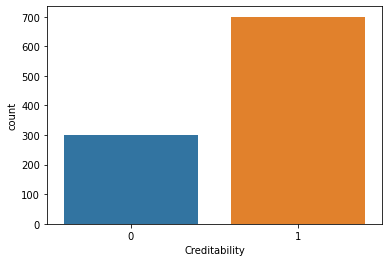

In [25]:
sns.countplot(df.Creditability)

In [24]:
df['Guarantors/Debtors'].value_counts()

1    907
3     52
2     41
Name: Guarantors/Debtors, dtype: int64

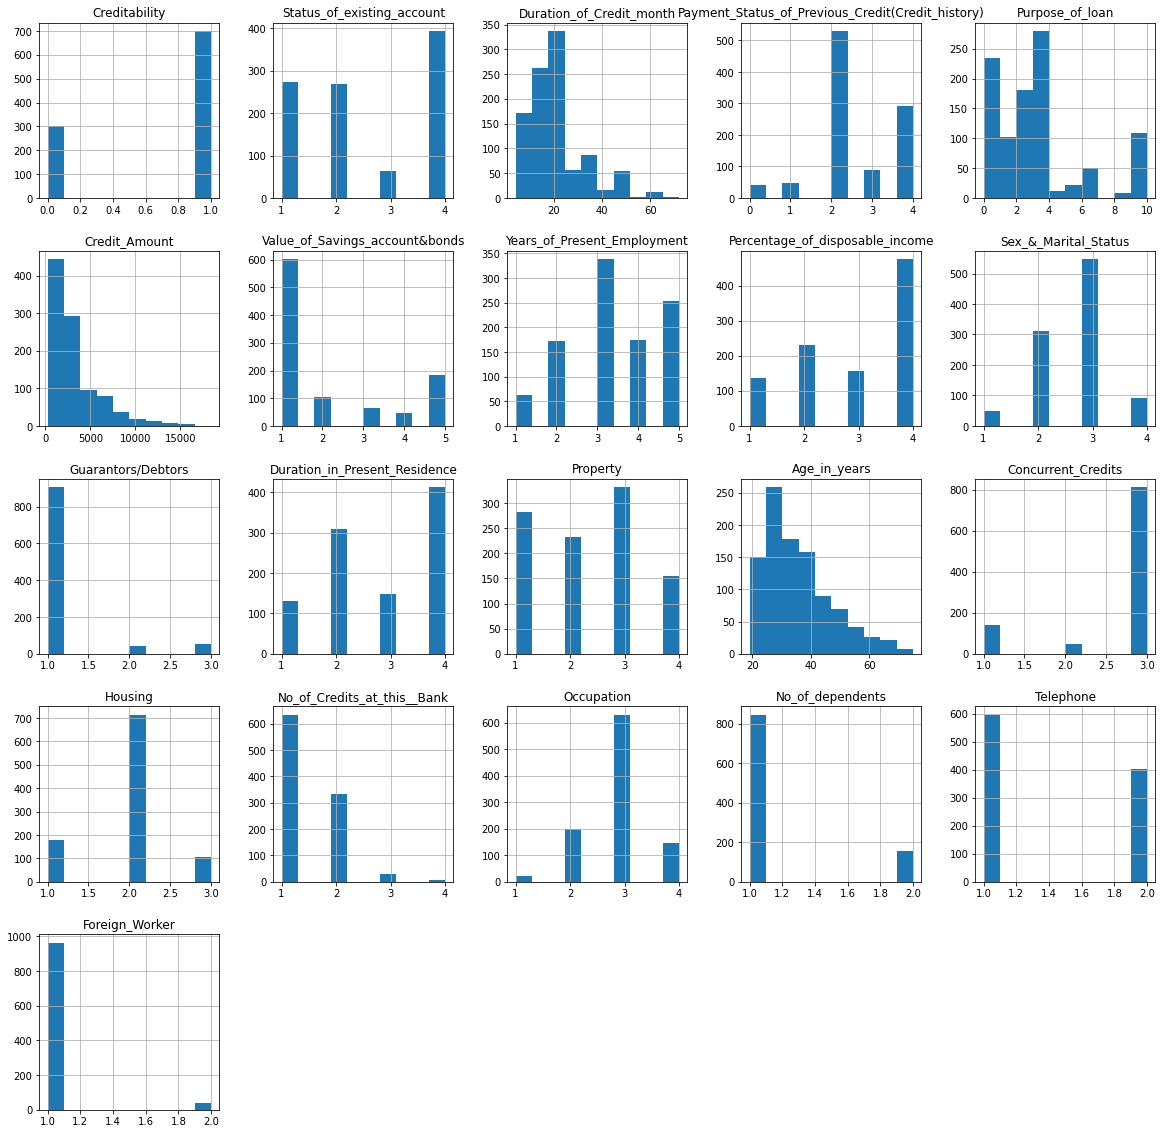

In [27]:
df.hist(figsize=(20,20));

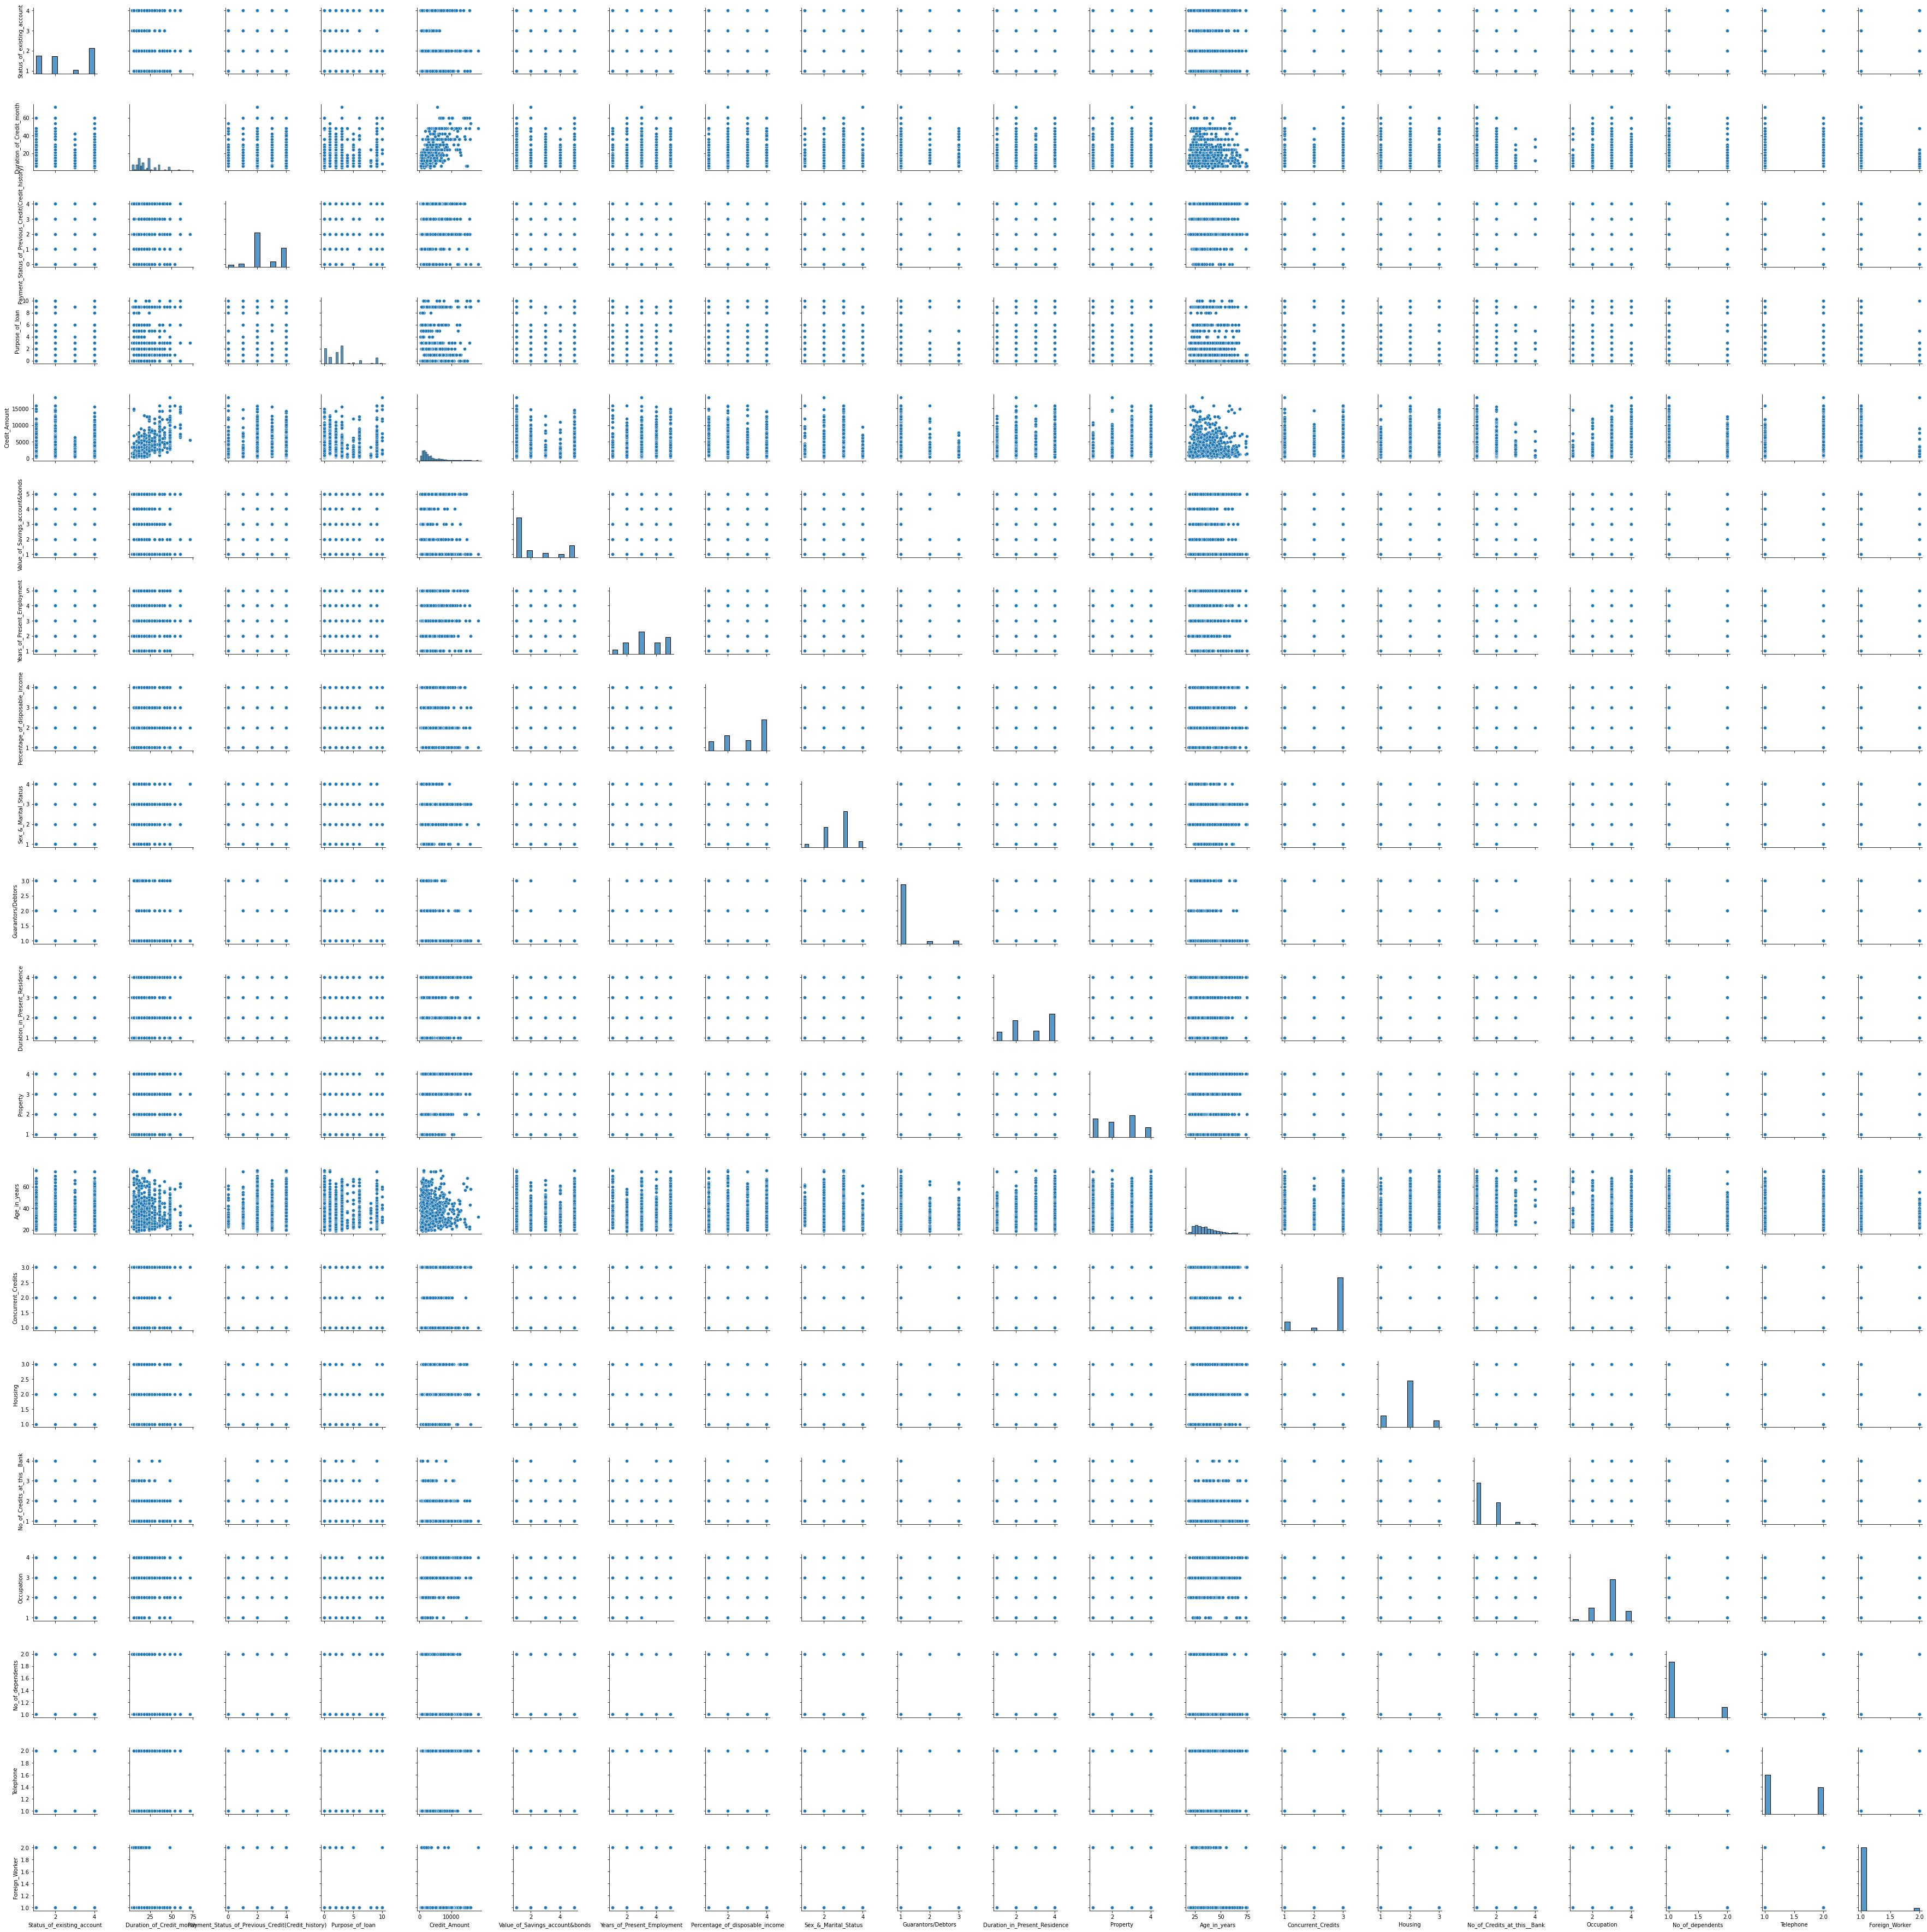

In [41]:
sns.pairplot(data=df)

### MODEL BUILDING

In [30]:
#splitting in train and test

import sklearn
from sklearn.model_selection import train_test_split


In [31]:
df_y =df.Creditability
df=df.drop(columns=['Creditability'])

In [32]:
df.head()

,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,Guarantors/Debtors,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [33]:
df_y.head()

0    1
1    1
2    1
3    1
4    1
Name: Creditability, dtype: int64

In [34]:
df_x_train , df_x_test , df_y_train , df_y_test = train_test_split(df , df_y , test_size = .2 , random_state=111)
print(df_x_test.shape)
print(df_x_train.shape)
print(df_y_test.shape)
print(df_y_train.shape)

(200, 20)
(800, 20)
(200,)
(800,)


In [35]:
#building the model

from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(df_x_train,df_y_train)

c:\users\ankit hiremath\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [38]:
pred_test = lr.predict(df_x_test)
pred_train = lr.predict(df_x_train)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(df_y_test , pred_test)

0.715

In [46]:
accuracy_score(df_y_train , pred_train)

0.76625

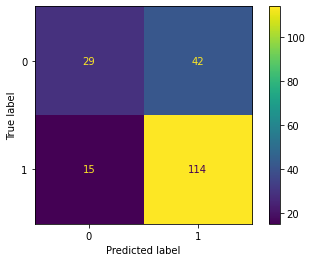

In [47]:
from sklearn.metrics import plot_confusion_matrix , plot_roc_curve
plot_confusion_matrix(lr , df_x_test , df_y_test)

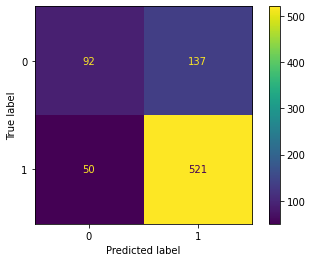

In [45]:
plot_confusion_matrix(lr , df_x_train , df_y_train)

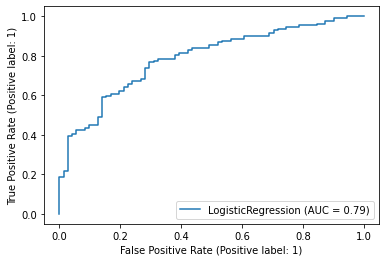

In [49]:
plot_roc_curve(lr , df_x_test , df_y_test)

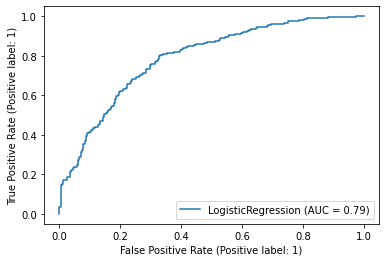

In [48]:
plot_roc_curve(lr , df_x_train , df_y_train)